# OpenCV 

* https://docs.opencv.org/4.x/
* https://pypi.org/project/opencv-python/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

In [2]:
import numpy as np
np.__version__

'1.22.3'

In [3]:
import cv2 as cv
cv.__version__

'4.6.0'

In [4]:
!ls -l ../../data/ring/

total 6712
-rw-r--r-- 1 olli olli 1538208 Jul  5 17:56 hand.jpg
-rw-r--r-- 1 olli olli    1034 Jul  5 17:56 hand.jpg:Zone.Identifier
-rw-r--r-- 1 olli olli  616420 Jul  5 16:59 stone-tilt-detection.jpg
-rw-r--r-- 1 olli olli  443314 Jul  5 14:57 stone-tilt.jpg
-rw-r--r-- 1 olli olli  822363 Jul  5 16:21 stone-top-detection.jpg
-rw-r--r-- 1 olli olli  588829 Jul  5 14:57 stone-top.jpg
-rw-r--r-- 1 olli olli  543506 Jul  5 17:26 table-top-flash-detection.jpg
-rw-r--r-- 1 olli olli  366996 Jul  5 14:57 table-top-flash.jpg
-rw-r--r-- 1 olli olli  377692 Jul  5 14:57 table-top.jpg
-rw-r--r-- 1 olli olli  473664 Jul  5 17:22 wama-tilt-detection.jpg
-rw-r--r-- 1 olli olli  337817 Jul  5 14:57 wama-tilt.jpg
-rw-r--r-- 1 olli olli  366593 Jul  5 14:57 wama-top-flash.jpg
-rw-r--r-- 1 olli olli  372068 Jul  5 14:57 wama-top.jpg


In [5]:
# img = cv.imread('../../data/ring/wama-top-flash.jpg')
# img = cv.imread('../../data/ring/wama-top.jpg')
# img = cv.imread('../../data/ring/wama-tilt.jpg')

img = cv.imread('../../data/ring/table-top.jpg')
# img = cv.imread('../../data/ring/table-top-flash.jpg')

# img = cv.imread('../../data/ring/stone-top.jpg')
# img = cv.imread('../../data/ring/stone-tilt.jpg')

In [6]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

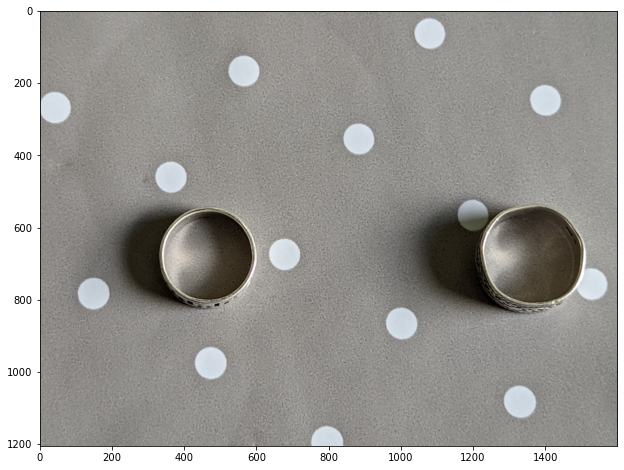

In [7]:
plt.imshow(img_rgb);

In [8]:
 img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

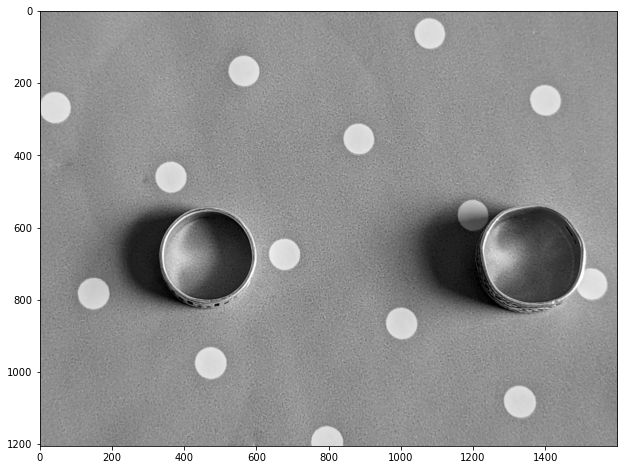

In [9]:
plt.imshow(img_gray, cmap='gray');

In [10]:
# aperture = 31
aperture = 21
img_gray_blur = cv.medianBlur(img_gray, ksize=aperture)

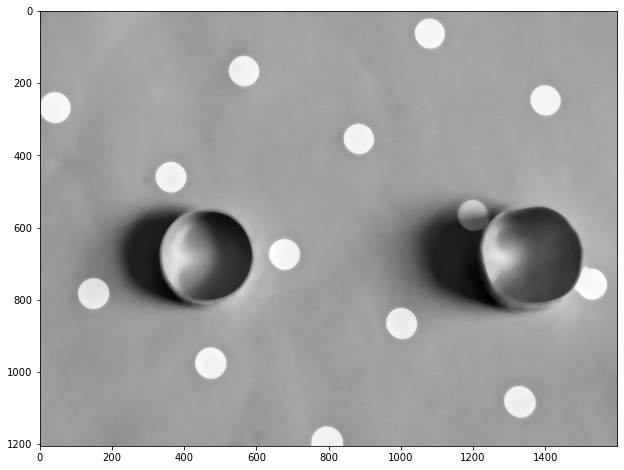

In [11]:
plt.imshow(img_gray_blur, cmap='gray');

In [12]:
rows = img_gray_blur.shape[0]
rows

1205

In [13]:
# https://docs.opencv.org/4.x/d4/d70/tutorial_hough_circle.html
# cv.HoughCircles?

In [14]:
threshold_canny_edge_detector = 100
threshold_circle_centers = 30

circles = cv.HoughCircles(
    image=img_gray_blur,
    method=cv.HOUGH_GRADIENT,
    dp=1,
    minDist=rows/8,
    param1=threshold_canny_edge_detector, 
    param2=threshold_circle_centers,
    minRadius=0, 
    maxRadius=0)
circles

array([[[ 461.5,  674.5,  126.2],
        [ 472.5,  974.5,   43.1],
        [1355.5,  673.5,  140.4],
        [  41.5,  267.5,   42.2],
        [ 882.5,  354.5,   41.6],
        [ 676.5,  674.5,   42.1],
        [ 362.5,  460.5,   42.4],
        [ 564.5,  165.5,   41.3],
        [1197.5,  564.5,   41.3],
        [1078.5,   61.5,   41.6],
        [1398.5,  247.5,   41.6],
        [ 148.5,  782.5,   42.5],
        [1001.5,  865.5,   42.4],
        [1329.5, 1081.5,   43.6],
        [1526.5,  755.5,   42.5],
        [ 793.5, 1192.5,   42.1]]], dtype=float32)

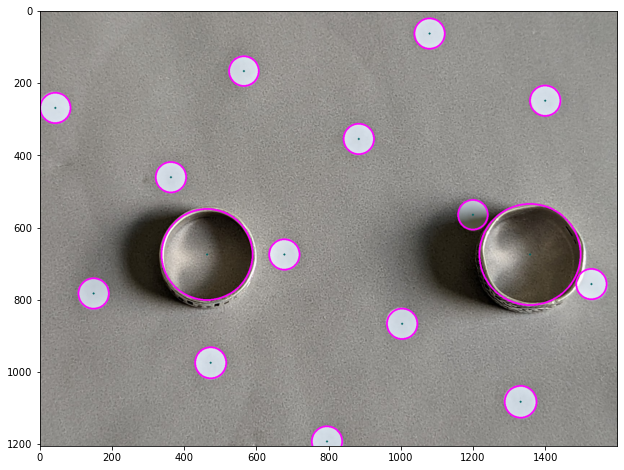

In [15]:
img_hough = img_rgb.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(img_hough, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(img_hough, center, radius, (255, 0, 255), 3)
plt.imshow(img_hough);

In [16]:
# cv.imwrite('detection.jpg', cv.cvtColor(img_hough, cv.COLOR_RGB2BGR))

True